In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets , model_selection , preprocessing, metrics 
import numpy as np
from sklearn.preprocessing import MinMaxScaler , LabelEncoder , StandardScaler

import seaborn as sns
from sklearn.metrics import accuracy_score ,confusion_matrix, classification_report , roc_curve, roc_auc_score
from sklearn.model_selection  import train_test_split
import warnings 
warnings.filterwarnings("ignore")


In [2]:
df= pd.read_csv('/kaggle/input/basic-datasets/house_prices.csv')
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [3]:
print(df.shape)
print(df.dtypes.value_counts())

(1460, 81)
object     43
int64      35
float64     3
Name: count, dtype: int64


In [4]:
df.drop(columns='Id',axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [6]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

**Filling missing value**

In [7]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
len(numerical_cols)

37

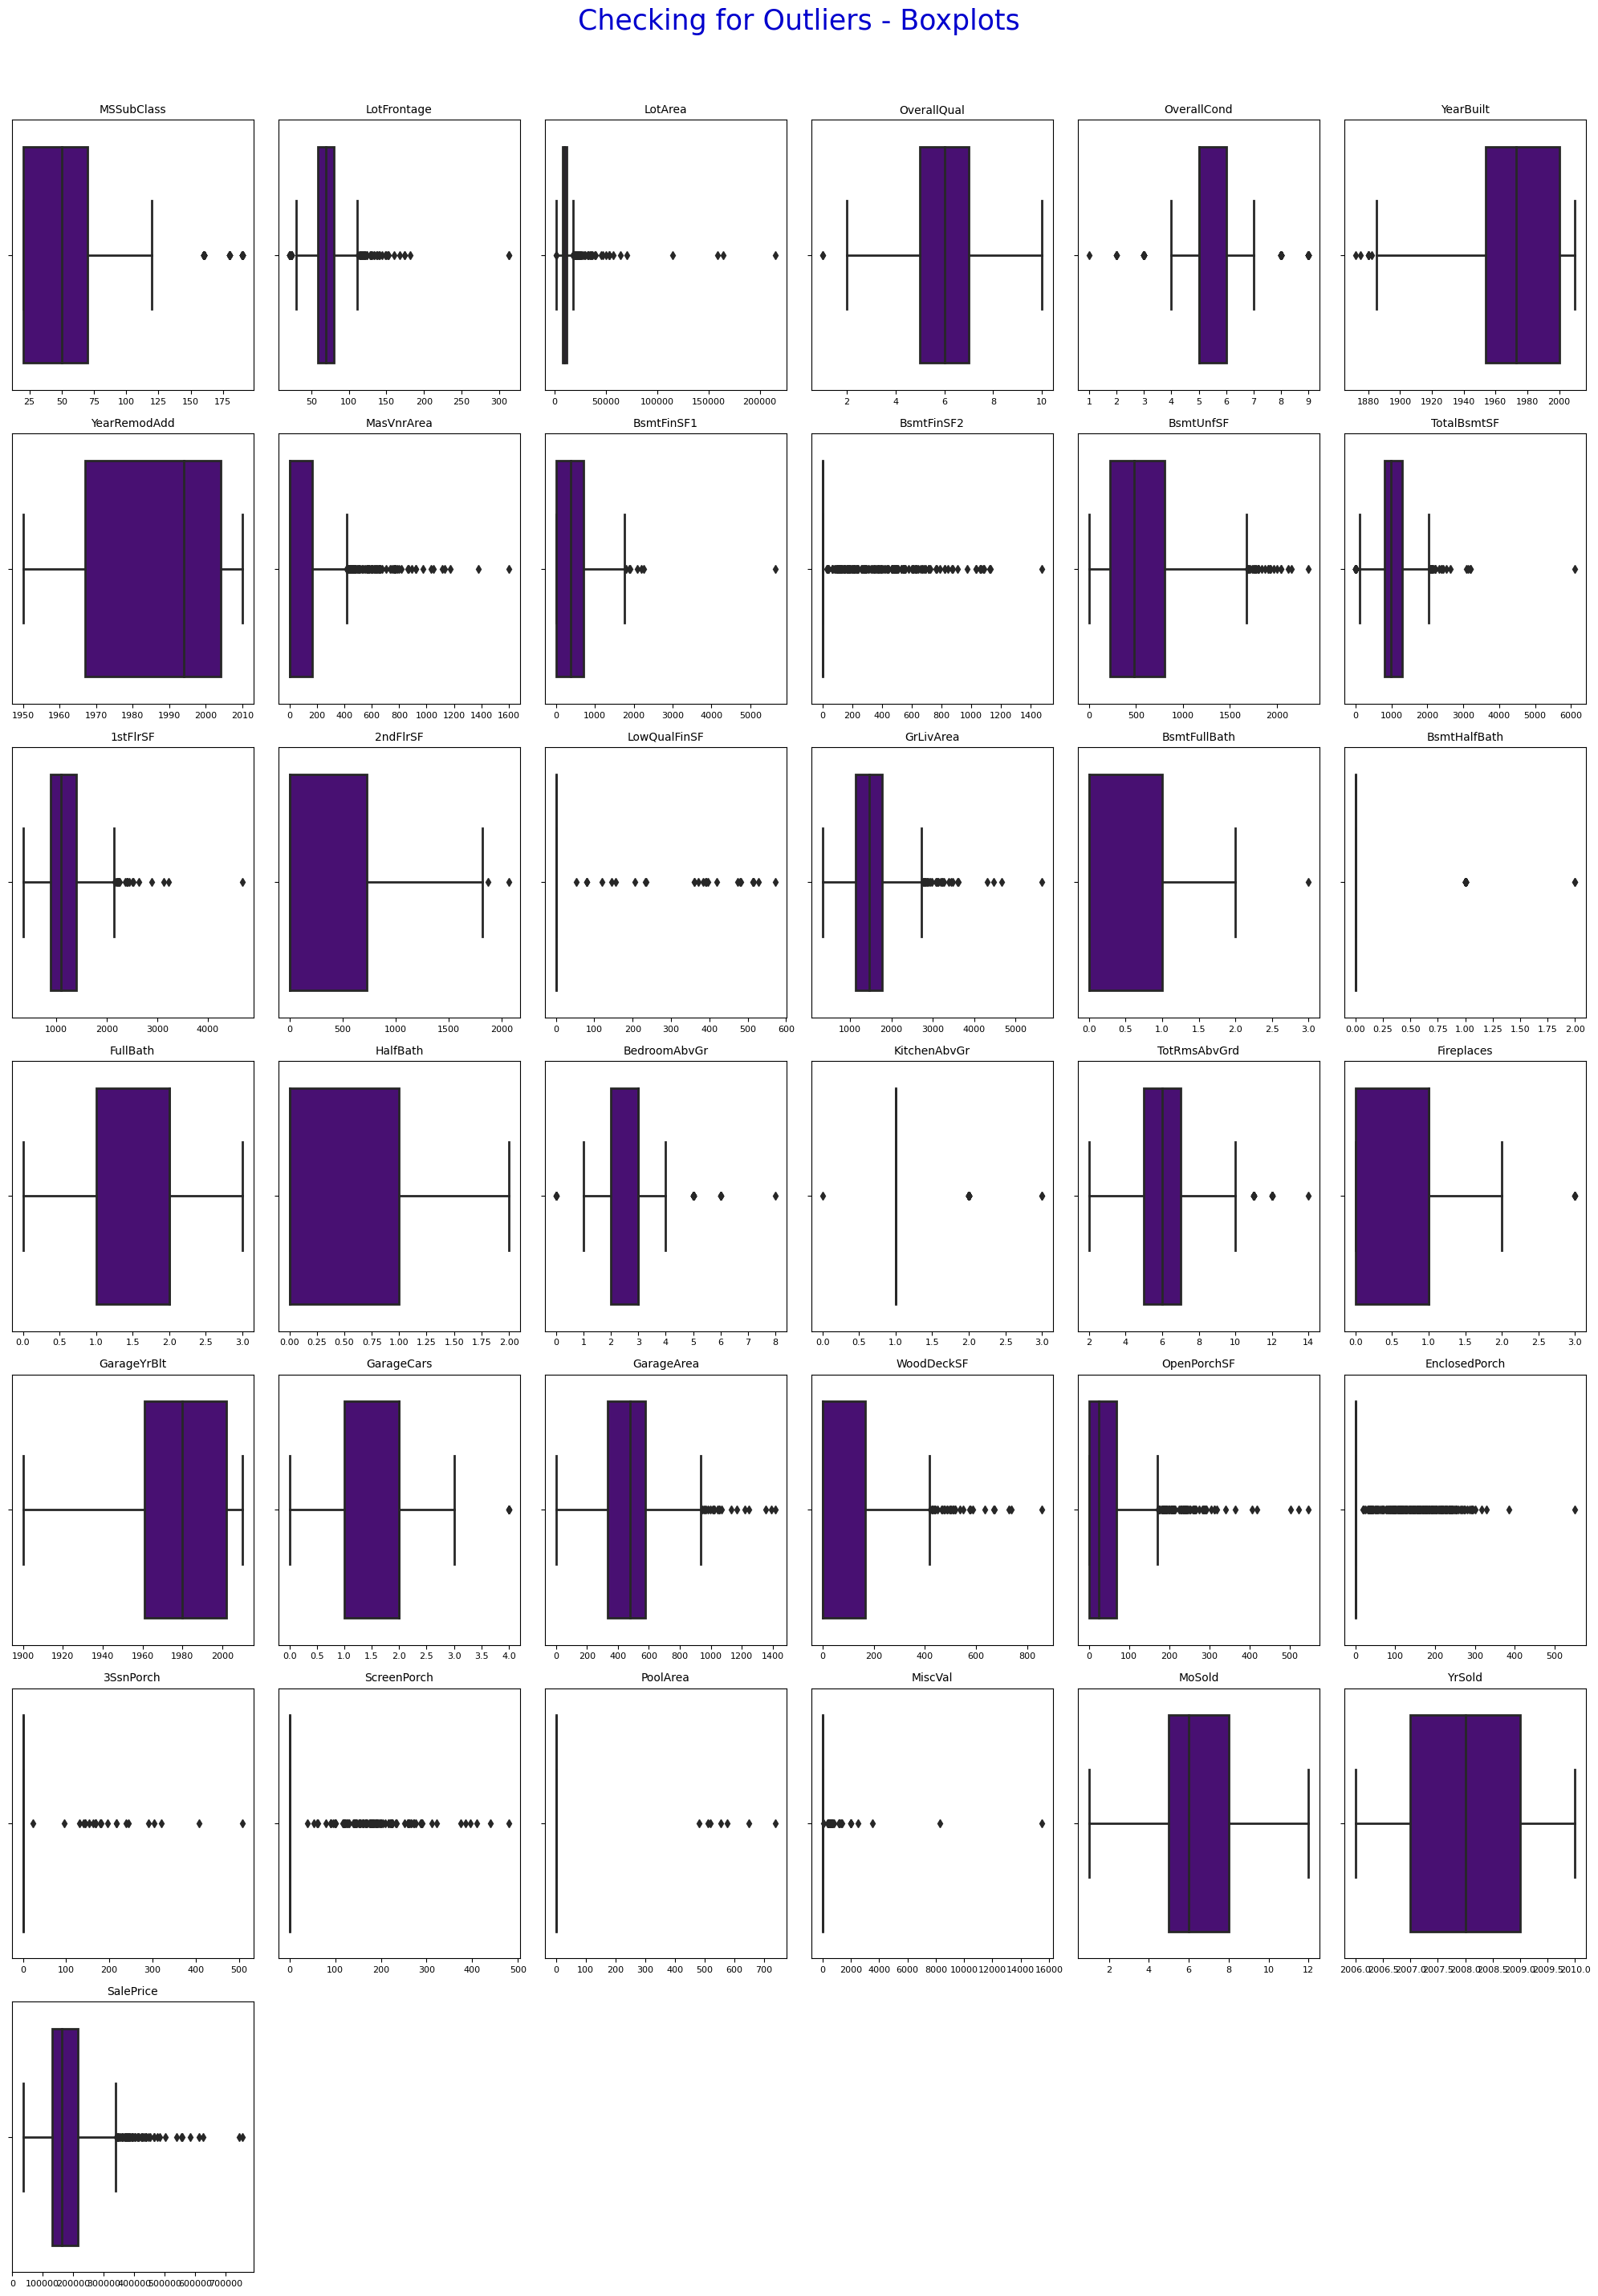

In [8]:
import math

n_cols = 6  #nombre de graphiques par ligne
n_rows = math.ceil(len(numerical_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))
axes = axes.flatten()  # pour pouvoir indexer facilement

plt.suptitle('Checking for Outliers - Boxplots', fontsize=25, color='mediumblue', y=1.02)

for i, col in enumerate(numerical_cols):
    sns.boxplot(x=df[col], ax=axes[i], color='indigo', linewidth=2)
    axes[i].set_title(col, fontsize=10)
    axes[i].tick_params(axis='x', labelsize=8)
    axes[i].set_xlabel("")

# Supprimer les axes restants si le nombre de graphiques est impair
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

# Analyse exploratoire des données (EDA)

**Valeurs manquantes**

In [9]:
missing_values = df.isnull().sum()

missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values
# % de valeurs manquantes
missing_percentage = (missing_values / len(df)) * 100
missing_percentage


PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

On supprime les colonnes comme PoolQC, MiscFeature, Alley, Fence, car elles dépassent 80 % de valeurs manquantes.

In [10]:
# Supposons que df est ton DataFrame
missing_threshold = 80.0  # Seuil en pourcentage
missing_percent = df.isnull().mean() * 100  # Pourcentage de NaN par colonne

# Colonnes à supprimer
cols_to_drop = missing_percent[missing_percent > missing_threshold].index

# Suppression
df = df.drop(columns=cols_to_drop)

print(f"Colonnes supprimées (>{missing_threshold}% de NaN) :", list(cols_to_drop))

Colonnes supprimées (>80.0% de NaN) : ['Alley', 'PoolQC', 'Fence', 'MiscFeature']


**Visualisation de la cible**

Text(0.5, 1.0, 'Distribution de SalePrice')

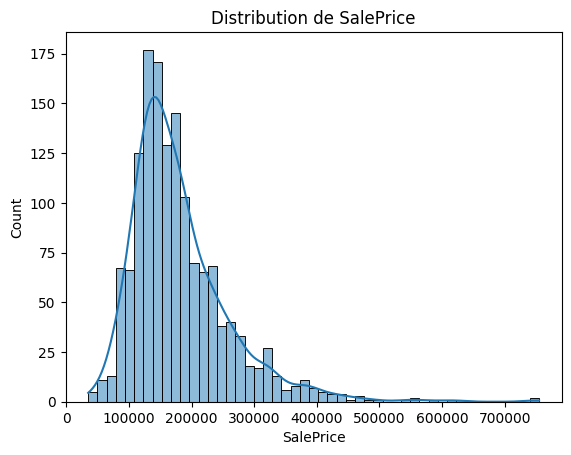

In [11]:
sns.histplot(df["SalePrice"], kde=True)
plt.title("Distribution de SalePrice")

**Corrélations**

<Axes: >

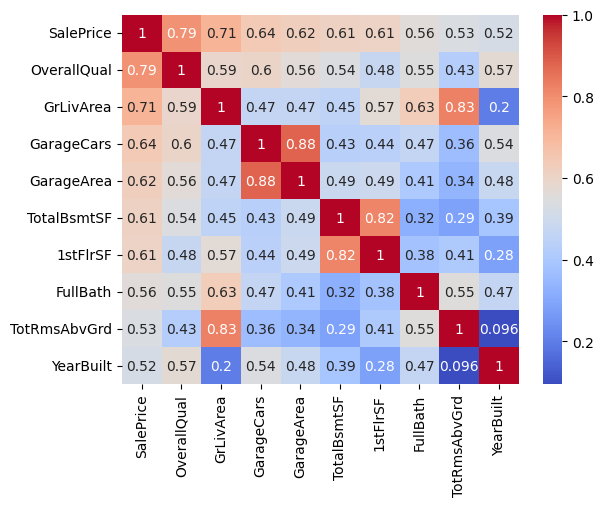

In [12]:
# Corrélation avec la cible
correlation = df.corr(numeric_only=True)["SalePrice"].sort_values(ascending=False)
correlation



top_features = correlation.index[:10]
corr_matrix = df[top_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")


<Axes: xlabel='MSZoning', ylabel='SalePrice'>

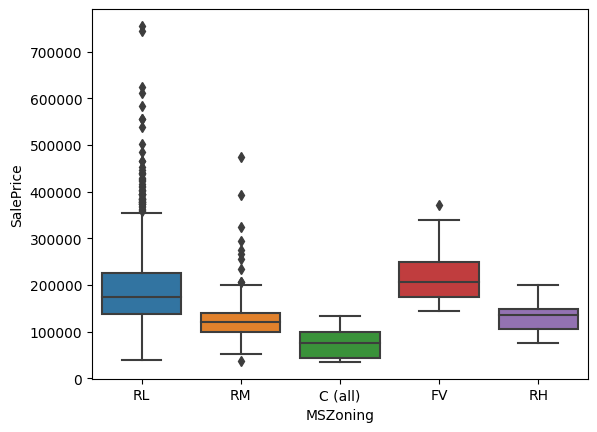

In [13]:
sns.boxplot(x="MSZoning", y="SalePrice", data=df)


**Remplir les valeurs manquantes**

In [14]:
# Catégoriques
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Numériques
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())


**Encodage des variables catégorielles**

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)


**Séparation des features & target**

In [16]:
X = df_encoded.drop("SalePrice", axis=1)
y = df_encoded["SalePrice"]


**Standardisation des données**

In [17]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


**Split train/test**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Entraînement des modèles

**Régression Linéaire**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("R2:", r2_score(y_test, y_pred_lr))
print("RMSE:", mean_squared_error(y_test, y_pred_lr, squared=False))


R2: -4.897268368592225e+16
RMSE: 19381343067816.914



**Interprétation**
**R²(valeur extrêmement négative)** 
**La régression linéaire échoue totalement ici. Un R² négatif indique que le modèle fait pire que si on prédisait simplement la moyenne des prix pour toutes les maisons.**

**NB:** cela suggère probablement un problème dans : la normalisation/standardisation des données, l’encodage des variables catégorielles, ou une multicolinéarité très forte non traitée.

**Random Forest**

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("R2:", r2_score(y_test, y_pred_rf))
print("RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


R2: 0.8925644769630212
RMSE: 28706.54120463479



**Interprétation :Très bonne performance.Le R² proche de 0.9 indique que le modèle explique environ 89,3 % de la variance des prix des maisons.Le RMSE est raisonnablement faible (28k), ce qui signifie que l’erreur moyenne sur les prédictions est d’environ 28 700 $.**


**XGBoost**

In [21]:
import xgboost as xgb

xgb_model = xgb.XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

print("R2:", r2_score(y_test, y_pred_xgb))
print("RMSE:", mean_squared_error(y_test, y_pred_xgb, squared=False))


R2: 0.89601510699696
RMSE: 28241.77844882944



**Interprétation :
Encore un peu meilleur que Random Forest.Il explique 89,6 % de la variance, avec une erreur moyenne légèrement plus faible (28 241 Dollar contre 28 706 Dollar).XGBoost bénéficie d’un meilleur contrôle du surapprentissage grâce à la régularisation et est souvent plus précis.**
